In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

COURSERA:

1) Para coursera trabajaré con 3 archivos csv

In [11]:
df_coursera_courses1 = pd.read_csv("datasets/Coursera_courses.csv", sep=',')
df_coursera_courses1.head(1)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning


In [12]:
df_coursera_courses2 = pd.read_csv("datasets/Coursera_reviews.csv", sep=',')
df_coursera_courses2.head(1)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training


In [13]:
df_coursera_courses1.drop_duplicates(inplace=True)
df_coursera_courses2.drop_duplicates(inplace=True)

2) Elimino las columnas en función de unir los demas archivos csv que contendrá la Data para el analsis de Coursera

In [14]:
df_coursera_courses2.drop(columns=['reviews','reviewers','date_reviews'], inplace=True)	

3) En vista de que tengo una columna en común de la cual podría basarme para completar la info de ambos dataset aplicaré el metodo .merge

In [16]:
df_coursera_courses1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 24.3+ KB


In [17]:
df_coursera_courses2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519947 entries, 0 to 1454644
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   rating     519947 non-null  int64 
 1   course_id  519947 non-null  object
dtypes: int64(1), object(1)
memory usage: 11.9+ MB


In [20]:
# Demostraciones sobre el punto 3 que permitirá justificar los nuevos duplicados

mask = (df_coursera_courses2['course_id']=='machine-learning')&(df_coursera_courses2['rating']==1) #se puede probar con diferentes valores
df_coursera_courses2.loc[mask, :]

,rating,course_id
1356576,1,machine-learning
1356577,1,machine-learning
1356578,1,machine-learning
1356579,1,machine-learning
1356580,1,machine-learning
...,...,...
1356740,1,machine-learning
1356741,1,machine-learning
1356742,1,machine-learning
1356743,1,machine-learning


In [23]:
#Creo un nuevo dataframe que tendrá los datos de los 2 csv sobre coursera atraves de un "Left Join"
df_coursera = pd.merge(df_coursera_courses1,df_coursera_courses2, on='course_id', how='left')
df_coursera.head()

#len(df_coursera.value_counts())

,name,institution,course_url,course_id,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,1.0
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,1.0
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,1.0
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,1.0
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,1.0


In [24]:
#Elimino los nuevos duplicados
df_coursera.drop_duplicates(inplace=True)
df_coursera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2778 entries, 0 to 519965
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2778 non-null   object 
 1   institution  2778 non-null   object 
 2   course_url   2778 non-null   object 
 3   course_id    2778 non-null   object 
 4   rating       2759 non-null   float64
dtypes: float64(1), object(4)
memory usage: 130.2+ KB


In [29]:
mask = (df_coursera['rating'].isna()==True)
df_coursera.loc[mask, :]

,name,institution,course_url,course_id,rating
203672,Game Theory,Stanford University,https://www.coursera.org/learn/game-theory-1,game-theory-1,NaN
245302,Organizational Analysis,Stanford University,https://www.coursera.org/learn/organizational-...,organizational-analysis,NaN
268856,"Divide and Conquer, Sorting and Searching, and...",Stanford University,https://www.coursera.org/learn/algorithms-divi...,algorithms-divide-conquer,NaN
314529,Circular Economy - Sustainable Materials Manag...,Delft University of Technology,https://www.coursera.org/learn/circular-economy,circular-economy,NaN
365188,Fundamentals of Music Theory,The University of Edinburgh,https://www.coursera.org/learn/edinburgh-music...,edinburgh-music-theory,NaN
385918,Unraveling the Cycling City,University of Amsterdam,https://www.coursera.org/learn/unraveling-the-...,unraveling-the-cycling-city,NaN
400829,Digital Media and Marketing Strategies,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/marketing-plan,marketing-plan,NaN
430015,The Changing Global Order,Universiteit Leiden,https://www.coursera.org/learn/changing-global...,changing-global-order,NaN
447693,De-Mystifying Mindfulness,Universiteit Leiden,https://www.coursera.org/learn/mindfulness,mindfulness,NaN
448274,Probabilistic Graphical Models 1: Representation,Stanford University,https://www.coursera.org/learn/probabilistic-g...,probabilistic-graphical-models,NaN


In [31]:
#Agrego el valor de la media a las columnas con valores nulos 
df_coursera = df_coursera.fillna({'rating':df_coursera['rating'].median()})

In [32]:
df_coursera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2778 entries, 0 to 519965
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2778 non-null   object 
 1   institution  2778 non-null   object 
 2   course_url   2778 non-null   object 
 3   course_id    2778 non-null   object 
 4   rating       2778 non-null   float64
dtypes: float64(1), object(4)
memory usage: 130.2+ KB


4) Finalizado el tratamiento de datos sobre los csv brindados inicialmente, anexo EDA de los otro dataset

In [57]:
df_coursera2 = pd.read_csv("datasets/coursera-course-detail-data.csv", sep=',')
df_coursera2.head()

,Unnamed: 0,Name,Url,Rating,Difficulty,Tags
0,0,"""Making"" Progress Teach-Out",https://coursera.org/learn/makingprogress,None,Beginner Level,"['Social Sciences', 'Governance and Society']"
1,1,(Business Writing) الكتابة في مجال الأعمال,https://coursera.org/learn/writing-for-busines...,None,Beginner Level,"['Business', 'Business Essentials']"
2,2,(Giving Helpful Feedback) إعطاء الملاحظات المفيدة,https://coursera.org/learn/feedback-ar,4.8,None,"['Business', 'Business Essentials']"
3,3,(Successful Presentation) العرض التقديمي الناجح,https://coursera.org/learn/presentation-skills-ar,4.9,Beginner Level,"['Business', 'Business Essentials']"
4,4,.Net平台下的软件开发技术毕业项目,https://coursera.org/learn/net-ruanjian-kaifa-...,None,None,"['Computer Science', 'Software Development']"


In [58]:
df_coursera2.drop(columns=['Unnamed: 0'], inplace=True)	
df_coursera2.head()

,Name,Url,Rating,Difficulty,Tags
0,"""Making"" Progress Teach-Out",https://coursera.org/learn/makingprogress,None,Beginner Level,"['Social Sciences', 'Governance and Society']"
1,(Business Writing) الكتابة في مجال الأعمال,https://coursera.org/learn/writing-for-busines...,None,Beginner Level,"['Business', 'Business Essentials']"
2,(Giving Helpful Feedback) إعطاء الملاحظات المفيدة,https://coursera.org/learn/feedback-ar,4.8,None,"['Business', 'Business Essentials']"
3,(Successful Presentation) العرض التقديمي الناجح,https://coursera.org/learn/presentation-skills-ar,4.9,Beginner Level,"['Business', 'Business Essentials']"
4,.Net平台下的软件开发技术毕业项目,https://coursera.org/learn/net-ruanjian-kaifa-...,None,None,"['Computer Science', 'Software Development']"


5) Comienzo normalización de ambos dataset:
* Creación columna language
* Eliminación de caracteres especiales y paso de caracteres a minusculas
* De la columna 'Tags' obtengo el valor de 'id_course'

In [59]:
#1 - df_coursera['language'].value_counts()
from langdetect import detect

df_coursera['language'] = df_coursera['name'].apply(detect)
df_coursera2['language'] = df_coursera2['Name'].apply(detect)

In [65]:
df_coursera2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        3850 non-null   object
 1   Url         3850 non-null   object
 2   Rating      3850 non-null   object
 3   Difficulty  3850 non-null   object
 4   Tags        3850 non-null   object
 5   language    3850 non-null   object
dtypes: object(6)
memory usage: 180.6+ KB


In [66]:
#2
df_coursera2 = df_coursera2.replace('\'', '', regex=True).astype(str)
df_coursera2 = df_coursera2.replace('\[', '', regex=True)
df_coursera2 = df_coursera2.replace('\]', '', regex=True)
df_coursera2.head()

,Name,Url,Rating,Difficulty,Tags,language
0,"""Making"" Progress Teach-Out",https://coursera.org/learn/makingprogress,None,Beginner Level,"Social Sciences, Governance and Society",en
1,(Business Writing) الكتابة في مجال الأعمال,https://coursera.org/learn/writing-for-busines...,None,Beginner Level,"Business, Business Essentials",ar
2,(Giving Helpful Feedback) إعطاء الملاحظات المفيدة,https://coursera.org/learn/feedback-ar,4.8,None,"Business, Business Essentials",ar
3,(Successful Presentation) العرض التقديمي الناجح,https://coursera.org/learn/presentation-skills-ar,4.9,Beginner Level,"Business, Business Essentials",it
4,.Net平台下的软件开发技术毕业项目,https://coursera.org/learn/net-ruanjian-kaifa-...,None,None,"Computer Science, Software Development",ko


In [67]:
#3 
df_coursera = df_coursera.applymap(lambda x : x.lower() if isinstance(x,str) else x)
df_coursera2 = df_coursera2.applymap(lambda x : x.lower() if isinstance(x,str) else x)

In [70]:
#4
df_coursera_Tags = df_coursera2.Tags.str.split(pat=',',expand=True)
df_coursera_Tags.rename(columns = {0:'Tema', 1:'Subtema'}, inplace = True)
df_coursera2.insert(6, column='Tema',value = df_coursera_Tags.Tema)
df_coursera2.insert(7, column='Subtema',value = df_coursera_Tags.Subtema)
df_coursera2.head()

,Name,Url,Rating,Difficulty,Tags,language,Tema,Subtema
0,"""making"" progress teach-out",https://coursera.org/learn/makingprogress,none,beginner level,"social sciences, governance and society",en,social sciences,governance and society
1,(business writing) الكتابة في مجال الأعمال,https://coursera.org/learn/writing-for-busines...,none,beginner level,"business, business essentials",ar,business,business essentials
2,(giving helpful feedback) إعطاء الملاحظات المفيدة,https://coursera.org/learn/feedback-ar,4.8,none,"business, business essentials",ar,business,business essentials
3,(successful presentation) العرض التقديمي الناجح,https://coursera.org/learn/presentation-skills-ar,4.9,beginner level,"business, business essentials",it,business,business essentials
4,.net平台下的软件开发技术毕业项目,https://coursera.org/learn/net-ruanjian-kaifa-...,none,none,"computer science, software development",ko,computer science,software development


In [71]:
#pongo nombres columnas en minusculas y dropeo columna 'tags' tambien

df_coursera2.columns= df_coursera2.columns.str.lower()
df_coursera2.drop(columns = 'tags', inplace = True)
df_coursera2.head()

,name,url,rating,difficulty,tags,language,tema,subtema
0,"""making"" progress teach-out",https://coursera.org/learn/makingprogress,none,beginner level,"social sciences, governance and society",en,social sciences,governance and society
1,(business writing) الكتابة في مجال الأعمال,https://coursera.org/learn/writing-for-busines...,none,beginner level,"business, business essentials",ar,business,business essentials
2,(giving helpful feedback) إعطاء الملاحظات المفيدة,https://coursera.org/learn/feedback-ar,4.8,none,"business, business essentials",ar,business,business essentials
3,(successful presentation) العرض التقديمي الناجح,https://coursera.org/learn/presentation-skills-ar,4.9,beginner level,"business, business essentials",it,business,business essentials
4,.net平台下的软件开发技术毕业项目,https://coursera.org/learn/net-ruanjian-kaifa-...,none,none,"computer science, software development",ko,computer science,software development


In [76]:
df_coursera2.drop(columns = 'tags', inplace = True)

In [77]:
mask = (df_coursera2['tema']=='machine learning')|(df_coursera2['subtema']=='machine learning')
df_coursera2.loc[mask,:]

,name,url,rating,difficulty,language,tema,subtema


In [79]:
mask = (df_coursera['course_id']=='computer science')
df_coursera.loc[mask,:]

,name,institution,course_url,course_id,rating,language


In [88]:
df_coursera.describe()

,rating
count,2778.000000
mean,3.097192
std,1.404986
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


Necesito convertir a float los valores de 'rating' sin embargo debo pasar primero a NaN los 'none' para aplicarle la función

In [89]:
df_coursera2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        3850 non-null   object
 1   url         3850 non-null   object
 2   rating      3850 non-null   object
 3   difficulty  3850 non-null   object
 4   language    3850 non-null   object
 5   tema        3850 non-null   object
 6   subtema     3842 non-null   object
dtypes: object(7)
memory usage: 210.7+ KB


In [91]:
mask = df_coursera2.loc[df_coursera2['rating'] == 'none', 'rating'] 
df_coursera2.loc[df_coursera2['rating'] == 'none', 'rating'] = np.nan

In [92]:
df_coursera2.rating.astype(float)

0       NaN
1       NaN
2       4.8
3       4.9
4       NaN
       ... 
3845    NaN
3846    NaN
3847    NaN
3848    NaN
3849    NaN
Name: rating, Length: 3850, dtype: float64

In [93]:
#Finalmente los NaN les aplico la media
df_coursera2 = df_coursera2.fillna({'rating':df_coursera2['rating'].median()})
df_coursera2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        3850 non-null   object
 1   url         3850 non-null   object
 2   rating      3850 non-null   object
 3   difficulty  3850 non-null   object
 4   language    3850 non-null   object
 5   tema        3850 non-null   object
 6   subtema     3842 non-null   object
dtypes: object(7)
memory usage: 210.7+ KB


EDX

In [154]:
df_edx_courses = pd.read_csv("datasets/edx_courses.csv", sep=',')
df_edx_courses.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


* Elimino las columnas a descartar para el analisis, aclaro que el objetivo es relacionarlo mas facilmente con el csv de UDEMY

In [155]:
df_edx_courses.drop(columns= ['summary', 'instructors','course_type', 'subtitles', 'course_description','course_syllabus','course_effort'], inplace=True)

In [156]:
df_edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          975 non-null    object
 1   n_enrolled     855 non-null    object
 2   institution    975 non-null    object
 3   Level          975 non-null    object
 4   subject        975 non-null    object
 5   language       975 non-null    object
 6   course_length  975 non-null    object
 7   price          975 non-null    object
 8   course_url     975 non-null    object
dtypes: object(9)
memory usage: 68.7+ KB


In [125]:
df_edx_courses.head()

,title,n_enrolled,institution,Level,subject,language,course_length,price,course_url
0,How to Learn Online,"124,980",edX,Introductory,Education & Teacher Training,English,2 Weeks,FREE-Add a Verified Certificate for $49 USD,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"293,864",The University of Michigan,Introductory,Computer Science,English,7 Weeks,FREE-Add a Verified Certificate for $49 USD,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,"2,442,271",Harvard University,Introductory,Computer Science,English,12 Weeks,FREE-Add a Verified Certificate for $90 USD,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"129,555",Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,13 Weeks,FREE-Add a Verified Certificate for $199 USD,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,"81,140","University of California, Berkeley",Introductory,Computer Science,English,4 Weeks,FREE-Add a Verified Certificate for $249 USD,https://www.edx.org/course/marketing-analytics...


* Convertir columna 'price' a una columna de enteros y obtener a la vez una para decir el tipo de moneda
* Covertir a minusculas los valores y columnas
* Normalizar los valores de la columna language
* Correción de formato y tipo de dato para price & n_rolled y arreglo de nulos para este ultimo

In [157]:
#verifico para realizar el split
df_edx_courses['price'].value_counts().sort_values().unique()

array([  1,   2,   3,   4,   5,   7,   8,   9,  13,  15,  19,  21,  26,
        30,  33,  49,  78,  85,  96, 137, 270], dtype=int64)

In [158]:
#1 comienzo proceso de normalizacion de price

df_edx_courses_prices = df_edx_courses.price.str.split(pat='$',expand=True)

In [159]:
df_edx_courses_prices.drop(columns= 0)
df_edx_courses_prices.rename(columns = {1:'Price'}, inplace = True)
df_edx_courses_prices = df_edx_courses_prices.Price.str.split(expand=True)


In [160]:
df_edx_courses_prices.rename(columns = {0:'Price',1:'currency'}, inplace = True)
df_edx_courses.insert(8, column='Price',value = df_edx_courses_prices.Price)
df_edx_courses.insert(9, column='currency',value = df_edx_courses_prices.currency)
df_edx_courses.head()


,title,n_enrolled,institution,Level,subject,language,course_length,price,Price,currency,course_url
0,How to Learn Online,"124,980",edX,Introductory,Education & Teacher Training,English,2 Weeks,FREE-Add a Verified Certificate for $49 USD,49,USD,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"293,864",The University of Michigan,Introductory,Computer Science,English,7 Weeks,FREE-Add a Verified Certificate for $49 USD,49,USD,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,"2,442,271",Harvard University,Introductory,Computer Science,English,12 Weeks,FREE-Add a Verified Certificate for $90 USD,90,USD,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"129,555",Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,13 Weeks,FREE-Add a Verified Certificate for $199 USD,199,USD,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,"81,140","University of California, Berkeley",Introductory,Computer Science,English,4 Weeks,FREE-Add a Verified Certificate for $249 USD,249,USD,https://www.edx.org/course/marketing-analytics...


In [161]:
df_edx_courses.drop(columns='price', inplace=True)

In [162]:
#2 Minusculas
df_edx_courses = df_edx_courses.applymap(lambda x : x.lower() if isinstance(x,str) else x)
df_edx_courses.columns= df_edx_courses.columns.str.lower()
df_edx_courses.head()

,title,n_enrolled,institution,level,subject,language,course_length,price,currency,course_url
0,how to learn online,"124,980",edx,introductory,education & teacher training,english,2 weeks,49,usd,https://www.edx.org/course/how-to-learn-online
1,programming for everybody (getting started wit...,"293,864",the university of michigan,introductory,computer science,english,7 weeks,49,usd,https://www.edx.org/course/programming-for-eve...
2,cs50's introduction to computer science,"2,442,271",harvard university,introductory,computer science,english,12 weeks,90,usd,https://www.edx.org/course/cs50s-introduction-...
3,the analytics edge,"129,555",massachusetts institute of technology,intermediate,data analysis & statistics,english,13 weeks,199,usd,https://www.edx.org/course/the-analytics-edge
4,marketing analytics: marketing measurement str...,"81,140","university of california, berkeley",introductory,computer science,english,4 weeks,249,usd,https://www.edx.org/course/marketing-analytics...


In [163]:
df_edx_courses['language'].value_counts().index

Index(['english', 'español', 'français', 'italiano', '中文', 'português', '日本語',
       'اللغة العربية', 'deutsch'],
      dtype='object')

In [164]:
#3
#df_edx_courses.language.value_counts().index.tolist() -> Los valores estan escritos en el idioma que significan

#df_edx_courses['language'] = df_edx_courses['language'].apply(detect)
# -> La utilizo para obtener los valores que aplica la funcion detect ['de', 'es', 'fr', 'it', 'zh-cn', 'pt', 'zh-tw', 'ar']


df_edx_courses['language'] = df_edx_courses['language'].map({'english':'en', 
                                                                'español':'es',
                                                                    'français':'fr', 
                                                                        'italiano':'it', 
                                                                            '中文':'zh-tw', 
                                                                                'português':'pt', 
                                                                                    '日本語':'zh-cn',
                                                                                        'اللغة العربية':'ar', 
                                                                                                'deutsch':'de'})

df_edx_courses['language'].value_counts()

en       777
es       176
fr         7
it         4
zh-tw      4
pt         4
zh-cn      1
ar         1
de         1
Name: language, dtype: int64

In [167]:
#3 vemos los nulos
df_edx_courses[df_edx_courses.n_enrolled.isnull()==True]

#imputamos para crear una nueva categoria
df_edx_courses = df_edx_courses.fillna({'n_enrolled':0})


,title,n_enrolled,institution,level,subject,language,course_length,price,currency,course_url
13,english grammar and style,NaN,the university of queensland,introductory,humanities,en,8 weeks,99,usd,https://www.edx.org/course/english-grammar-and...
459,business communication,NaN,rochester institute of technology,introductory,communication,en,3 weeks,199,usd,https://www.edx.org/course/business-communicat...
462,agua 2.0: empresas eficientes para el siglo xxi,NaN,inter-american development bank,introductory,business & management,es,8 weeks,25,usd,https://www.edx.org/course/agua-20-empresas-ef...
494,introduction to cloud computing,NaN,ibm,introductory,computer science,en,6 weeks,49,usd,https://www.edx.org/course/introduction-to-clo...
502,sql aplicado en la ciencia de datos,NaN,ibm,introductory,data analysis & statistics,es,4 weeks,39,usd,https://www.edx.org/course/sql-aplicado-en-la-...
...,...,...,...,...,...,...,...,...,...,...
967,drones and autonomous systems 2: applications ...,NaN,university of maryland global campus-universit...,intermediate,science,en,6 weeks,149,usd,https://www.edx.org/course/drones-and-autonomo...
968,mathtrackx: differential calculus,NaN,university of adelaide,introductory,math,en,4 weeks,79,usd,https://www.edx.org/course/mathtrackx-differen...
970,leaders in citizen security and justice manage...,NaN,inter-american development bank,intermediate,social sciences,en,10 weeks,25,usd,https://www.edx.org/course/leaders-in-citizen-...
971,pattern studying and making | 图案审美与创作,NaN,tsinghua university,introductory,art & culture,zh-tw,12 weeks,139,usd,https://www.edx.org/course/pattern-studying-an...


In [170]:
df_edx_courses = df_edx_courses.fillna({'n_enrolled':0})
df_edx_courses.n_enrolled.astype(float)
df_edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          975 non-null    object
 1   n_enrolled     975 non-null    object
 2   institution    975 non-null    object
 3   level          975 non-null    object
 4   subject        975 non-null    object
 5   language       975 non-null    object
 6   course_length  975 non-null    object
 7   price          975 non-null    object
 8   currency       975 non-null    object
 9   course_url     975 non-null    object
dtypes: object(10)
memory usage: 76.3+ KB


4) df_edx_courses.n_enrolled.astype(float) -> como hay , entre los valores hay dos posibles soluciones
ValueError: could not convert string to float: '124,980'

In [175]:
# df_edx_courses.["n_enrolled"] = pd.to_numeric(df_edx_courses.["n_enrolled"]) una posible forma
df_edx_courses["n_enrolled"] = df_edx_courses["n_enrolled"].str.replace('.','')
df_edx_courses["n_enrolled"] = df_edx_courses["n_enrolled"].str.replace(',','.')
df_edx_courses["n_enrolled"] = df_edx_courses["n_enrolled"].astype(float)

C:\Users\mateo\AppData\Local\Temp\ipykernel_2356\752676036.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_edx_courses["n_enrolled"] = df_edx_courses["n_enrolled"].str.replace('.','')


In [180]:
# price tambien debe convertirse a formato numerico
df_edx_courses["price"] = df_edx_courses["price"].str.replace(',','.')
df_edx_courses["price"] = df_edx_courses["price"].astype(float)

In [181]:
df_edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          975 non-null    object 
 1   n_enrolled     855 non-null    float64
 2   institution    975 non-null    object 
 3   level          975 non-null    object 
 4   subject        975 non-null    object 
 5   language       975 non-null    object 
 6   course_length  975 non-null    object 
 7   price          975 non-null    float64
 8   currency       975 non-null    object 
 9   course_url     975 non-null    object 
dtypes: float64(2), object(8)
memory usage: 76.3+ KB


UDEMY

In [98]:
df_udemy_courses = pd.read_csv("datasets/udemy_courses.csv", sep=',')
df_udemy_courses.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance


1) Elimino las columnas que no utilizaré para mis respectivos analisis

In [105]:
df_udemy_courses.drop(columns=['num_reviews', 'num_lectures', 'published_timestamp', 'course_id', 'is_paid', 'num_lectures', 'published_timestamp'], inplace=True )	

In [107]:
df_udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_title      3678 non-null   object 
 1   url               3678 non-null   object 
 2   price             3678 non-null   int64  
 3   num_subscribers   3678 non-null   int64  
 4   level             3678 non-null   object 
 5   content_duration  3678 non-null   float64
 6   subject           3678 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 201.3+ KB


Creo la columna de language

In [108]:
from langdetect import detect

df_udemy_courses['language'] = df_udemy_courses['course_title'].apply(detect)


In [123]:
df_udemy_courses.head()

,course_title,url,price,num_subscribers,level,content_duration,subject,language
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,200,2147,For all,1.5,Business Finance,en
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,75,2792,For all,39.0,Business Finance,en
2,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,45,2174,Intermediate,2.5,Business Finance,en
3,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,95,2451,For all,3.0,Business Finance,en
4,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,200,1276,Intermediate,2.0,Business Finance,en


* Normalizar el los valores de 'Expert','Intermediate', 'Beginner' del campo 'level' a los valores utilizados en edx.csv
* Conversion a minusculas
* No hay imputaciones o eliminaciones debido a la ausencia de nulos, outliyers o valores duplicados

In [124]:
#1 Obtengo valores unicos para identificar valores a normalizar

df_udemy_courses['level'].value_counts().sort_values()
#df_edx_courses['Level'].value_counts().sort_values()

Advanced          58
Intermediate     421
Introductory    1270
For all         1929
Name: level, dtype: int64

In [121]:
df_udemy_courses['level'] = df_udemy_courses['level'].map({ 'Expert Level': 'Advanced', 
                                                            'Intermediate Level': 'Intermediate', 
                                                            'Beginner Level': 'Introductory', 
                                                            'All Levels':'For all'   
                                                                                    })

In [122]:
df_udemy_courses['level'].value_counts().sort_values()

Advanced          58
Intermediate     421
Introductory    1270
For all         1929
Name: level, dtype: int64

In [178]:
df_udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_title      3678 non-null   object 
 1   url               3678 non-null   object 
 2   price             3678 non-null   int64  
 3   num_subscribers   3678 non-null   int64  
 4   level             3678 non-null   object 
 5   content_duration  3678 non-null   float64
 6   subject           3678 non-null   object 
 7   language          3678 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 230.0+ KB


In [ ]:
#df_coursera2 = df_coursera2.fillna({'rating':df_coursera2['rating'].median()})

WORLD CLOUD

In [187]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

UsageError: Line magic function `%` not found.


Arreglo el indice de los csv de Coursera

In [191]:
#df_coursera.reset_index().drop(columns='index')
df_coursera = df_coursera.reset_index().drop(columns='index')
df_coursera.head()

,name,institution,course_url,course_id,rating,language
0,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning,1.0,en
1,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning,2.0,en
2,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning,3.0,en
3,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning,4.0,en
4,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning,5.0,en


In [192]:
df_coursera2.head()

,name,url,rating,difficulty,language,tema,subtema
0,"""making"" progress teach-out",https://coursera.org/learn/makingprogress,4.7,beginner level,en,social sciences,governance and society
1,(business writing) الكتابة في مجال الأعمال,https://coursera.org/learn/writing-for-busines...,4.7,beginner level,ar,business,business essentials
2,(giving helpful feedback) إعطاء الملاحظات المفيدة,https://coursera.org/learn/feedback-ar,4.8,none,ar,business,business essentials
3,(successful presentation) العرض التقديمي الناجح,https://coursera.org/learn/presentation-skills-ar,4.9,beginner level,it,business,business essentials
4,.net平台下的软件开发技术毕业项目,https://coursera.org/learn/net-ruanjian-kaifa-...,4.7,none,ko,computer science,software development


In [218]:
titulo_coursera1 = df_coursera[['name','rating']]
titulo_coursera1.head()

,name,rating
0,machine learning,1.0
1,machine learning,2.0
2,machine learning,3.0
3,machine learning,4.0
4,machine learning,5.0


Analisis y visualizaciones sobre los csv de coursera

In [220]:
titulo_coursera1.groupby('name').mean().sort_values(by="rating",ascending=False).head(10)

,rating
name,
how to manage a remote team,5.0
removing barriers to change,5.0
building modern python applications on aws,5.0
entreprise et changement climatique,5.0
fundamentals of machine learning for healthcare,4.5
refugees in the 21st century,4.5
become a cbrs certified professional installer by google,4.5
social work practice: advocating social justice and change,4.5
bugs 101: insect-human interactions,4.5


In [214]:
titulo = titulo_coursera1.groupby('name')
titulo.describe().head()

rating                  \
                                                    count  mean       std   
name                                                                        
a crash course in causality:  inferring causal ...    4.0  3.25  1.707825   
a crash course in data science                        1.0  3.00       NaN   
a law student's toolkit                               5.0  3.00  1.581139   
aboriginal worldviews and education                   5.0  3.00  1.581139   
access controls                                       5.0  3.00  1.581139   

                                                                              
                                                    min  25%  50%   75%  max  
name                                                                          
a crash course in causality:  inferring causal ...  1.0  2.5  3.5  4.25  5.0  
a crash course in data science                      3.0  3.0  3.0  3.00  3.0  
a law student's toolkit                             1.0  2.0  3.0  4.00  5.0  
aboriginal worldviews and education                 1.0  2.0  3.0  4.00  5.0  
access controls                                     1.0  2.0  3.0  4.00  5.0

In [215]:
titulo.mean().sort_values(by="rating",ascending=False).head()

,rating
name,
how to manage a remote team,5.0
removing barriers to change,5.0
building modern python applications on aws,5.0
entreprise et changement climatique,5.0
fundamentals of machine learning for healthcare,4.5


In [ ]:
#representación grafica de los que tienen mejor media
"""
plt.figure(figsize=(15,10))
titulo.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("titulos")
plt.ylabel("rating general")
plt.show()
"""

In [ ]:
#Creo el objeto que tendrá llos componentes del wordcloud
titulos = " ".join(cat.split()[0] for cat in df_coursera.name)

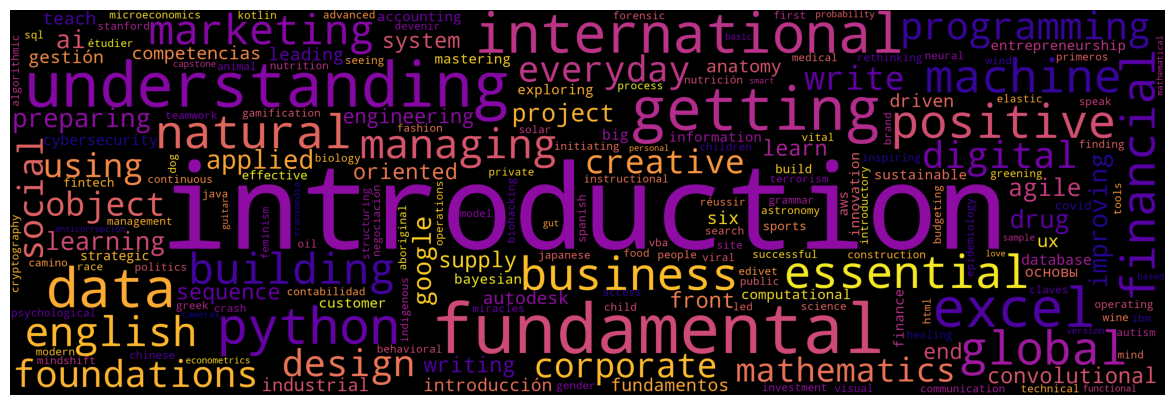

In [221]:
def plot_cloud (wordcloud):
    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud = WordCloud(width=3000, height=1000, background_color='black', colormap='plasma', collocations=False, stopwords=STOPWORDS).generate(titulos)
plot_cloud(wordcloud)

In [223]:
#Guardo la imagen en la dirección ('pi03_env/cloudCoursera1')
wordcloud.to_file('cloudCoursera1.png')


In [225]:
#pruebo con la columna 'course_id'
titulos = " ".join(cat.split()[0] for cat in df_coursera.course_id)

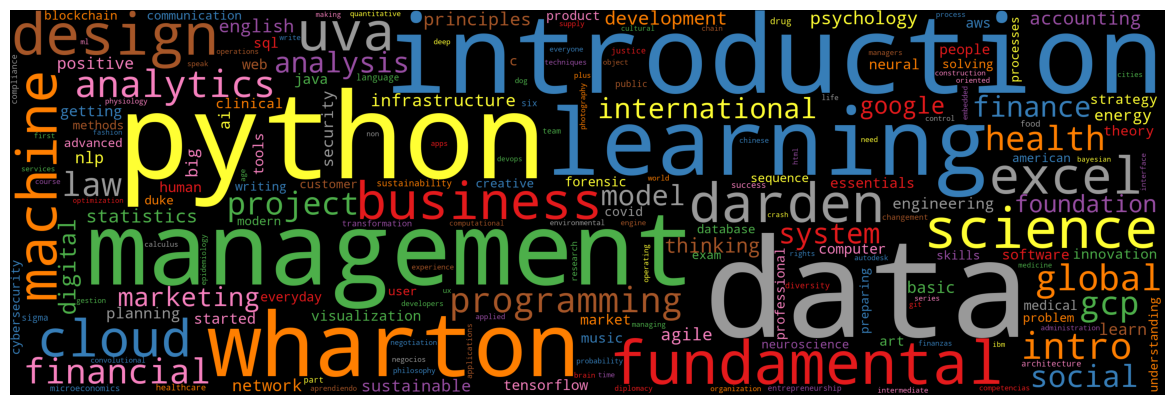

In [229]:
wordcloud = WordCloud(width=3000, height=1000, background_color='black', colormap='Set1', collocations=False, stopwords=STOPWORDS).generate(titulos)
plot_cloud(wordcloud)

In [230]:
#Este la verdad me gustó mas toncs lo voy a guardar y eliminaré el otro xd
wordcloud.to_file('cloudCoursera1.png')

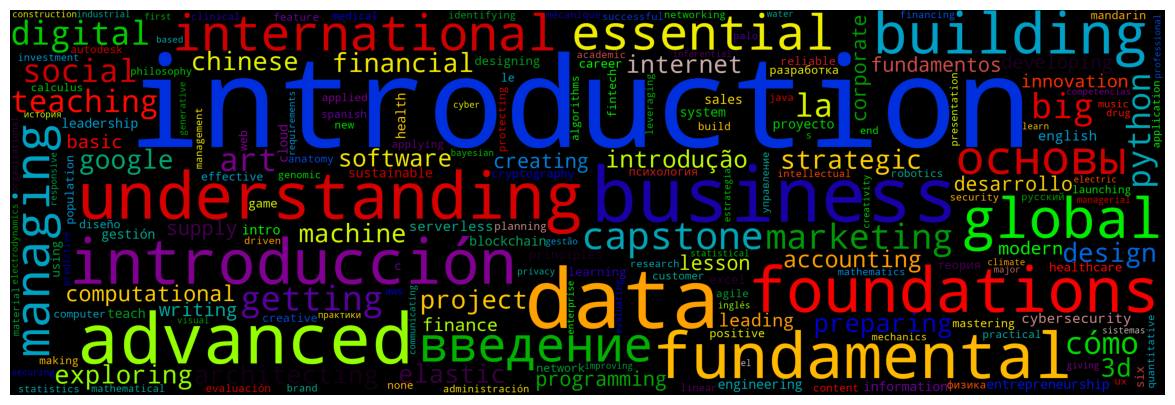

In [232]:
titulos = " ".join(cat.split()[0] for cat in df_coursera2.name)
wordcloud = WordCloud(width=3000, height=1000, background_color='black', colormap='nipy_spectral', collocations=False, stopwords=STOPWORDS).generate(titulos)
plot_cloud(wordcloud)

In [233]:
wordcloud.to_file('cloudCoursera2.png')

EDX y UDEMY WORDCLOUD

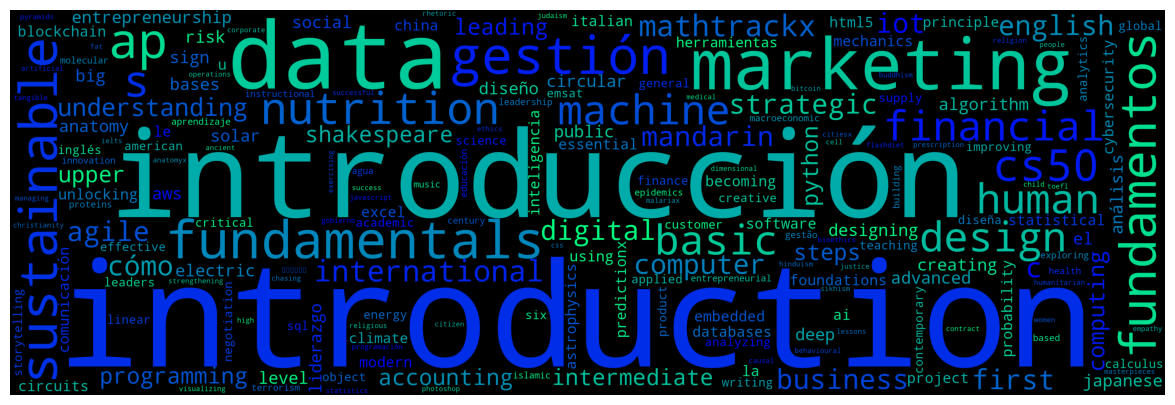

In [248]:
titulos = " ".join(cat.split()[0] for cat in df_edx_courses.title)
wordcloud = WordCloud(width=3000, height=1000, background_color='black', colormap='winter', collocations=False, stopwords=STOPWORDS).generate(titulos)
plot_cloud(wordcloud)

In [249]:
wordcloud.to_file('cloudEdx.png')

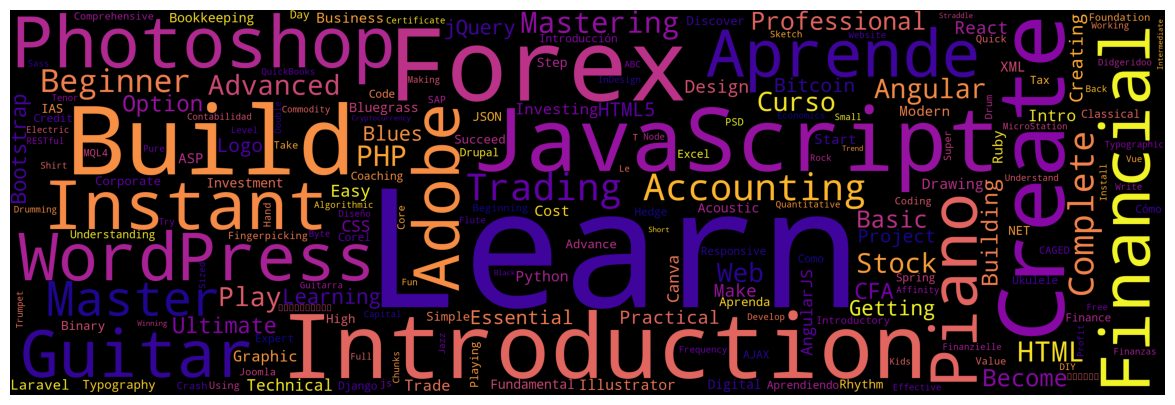

In [246]:
titulos = " ".join(cat.split()[0] for cat in df_udemy_courses.course_title)
wordcloud = WordCloud(width=3000, height=1000, background_color='black', colormap='plasma', collocations=False, stopwords=STOPWORDS).generate(titulos)
plot_cloud(wordcloud)

In [247]:
wordcloud.to_file('cloudUdemy.png')

Por ultimo, exportaré los documentos como csv para trabajarlos en Power BI

In [250]:
df_coursera.head()


,name,institution,course_url,course_id,rating,language
0,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning,1.0,en
1,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning,2.0,en
2,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning,3.0,en
3,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning,4.0,en
4,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning,5.0,en


In [251]:
df_coursera2.head()

,name,url,rating,difficulty,language,tema,subtema
0,"""making"" progress teach-out",https://coursera.org/learn/makingprogress,4.7,beginner level,en,social sciences,governance and society
1,(business writing) الكتابة في مجال الأعمال,https://coursera.org/learn/writing-for-busines...,4.7,beginner level,ar,business,business essentials
2,(giving helpful feedback) إعطاء الملاحظات المفيدة,https://coursera.org/learn/feedback-ar,4.8,none,ar,business,business essentials
3,(successful presentation) العرض التقديمي الناجح,https://coursera.org/learn/presentation-skills-ar,4.9,beginner level,it,business,business essentials
4,.net平台下的软件开发技术毕业项目,https://coursera.org/learn/net-ruanjian-kaifa-...,4.7,none,ko,computer science,software development


In [252]:
df_edx_courses.head()

,title,n_enrolled,institution,level,subject,language,course_length,price,currency,course_url
0,how to learn online,124980.0,edx,introductory,education & teacher training,en,2 weeks,49.0,usd,https://www.edx.org/course/how-to-learn-online
1,programming for everybody (getting started wit...,293864.0,the university of michigan,introductory,computer science,en,7 weeks,49.0,usd,https://www.edx.org/course/programming-for-eve...
2,cs50's introduction to computer science,2442271.0,harvard university,introductory,computer science,en,12 weeks,90.0,usd,https://www.edx.org/course/cs50s-introduction-...
3,the analytics edge,129555.0,massachusetts institute of technology,intermediate,data analysis & statistics,en,13 weeks,199.0,usd,https://www.edx.org/course/the-analytics-edge
4,marketing analytics: marketing measurement str...,81140.0,"university of california, berkeley",introductory,computer science,en,4 weeks,249.0,usd,https://www.edx.org/course/marketing-analytics...


In [253]:
df_udemy_courses.head()

,course_title,url,price,num_subscribers,level,content_duration,subject,language
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,200,2147,For all,1.5,Business Finance,en
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,75,2792,For all,39.0,Business Finance,en
2,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,45,2174,Intermediate,2.5,Business Finance,en
3,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,95,2451,For all,3.0,Business Finance,en
4,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,200,1276,Intermediate,2.0,Business Finance,en


In [254]:
#Exporto df finales

df_coursera.to_csv('data_coursera1.csv', index=False, encoding='utf-8')
df_coursera2.to_csv('data_coursera2.csv', index=False, encoding='utf-8')
df_edx_courses.to_csv('data_edx.csv', index=False, encoding='utf-8')
df_udemy_courses.to_csv('data_udemy.csv', index=False, encoding='utf-8')